<a href="https://colab.research.google.com/github/prajakta311/git---session/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#28x28 grey scale images
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()  # Getting the dataset

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
label_encoder = {0: 'T-shirt/top',
                 1: 'Trouser',
                 2: 'Pullover',
                 3: 'Dress',
                 4: 'Coat',
                 5: 'Scandal',
                 6: 'Shirt',
                 7: 'Sneaker',
                 8: 'Bag',
                 9: 'Ankle Boot'} #Giving label to our images by creating a dictionary

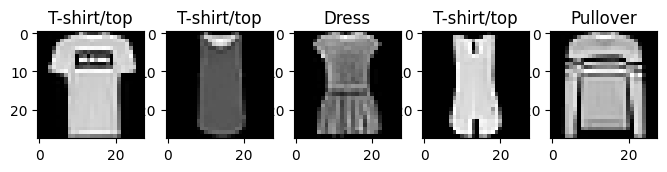

In [8]:
plt.figure(figsize=(8, 6))
for i in range(1, 6):
 plt.subplot(1,5,i)  # 1 is how many number of rows you want, 5 is number of columns and i is for the images
 plt.imshow(x_train[i], cmap='gray')
 plt.title(label_encoder[y_train[i]])

In [9]:
# Plot 6 images for each category and images should be random everytime
# Perform EDA

In [10]:
# Pre Processing
# Input
x_train = x_train / 255.0  # Normalization

#Output
y_train = pd.get_dummies(y_train)


In [11]:
x_train.shape, y_train.shape # There is a difference in ytrain, why? For each label. we have converted that into a big array of 10 digits

((60000, 28, 28), (60000, 10))

In [12]:
# Model, There are 2 types of model, sequential, functional.
# Here we will use sequential one because we know that each layer is going to be connected to the previous one
model = tf.keras.models.Sequential()
# The first thing we do after building a model is adding layers
# First Layer (Input)
model.add(tf.keras.layers.Input((28, 28), name='InputLayer'))  # Because this is a sequential model we will add layers.
# Then we ask keras to give us some layers, then we have to tell which layer we want (here we want a input layer).
#Input layer asks for the shape of the image i.e. 28x28

# Flattening the input. The image that we have added is a 2D image i.e. a height and a width. so we will have to flatten it
model.add(tf.keras.layers.Flatten(name='Flatten'))

# Hidden Layer
model.add(tf.keras.layers.Dense(128, activation = tf.keras.activations.relu, name='HiddenLayer'))

# What if the model cannot activate itself in 128 so we will just add the second layer, we don't know if it's needed or not
model.add(tf.keras.layers.Dense(16, activation = tf.keras.activations.relu,name='HiddenLayer2'))   # You cannot add the second layer after the output
# This is the sequence in which the layers will be added and the model will be built

# Output Layers - Here we are using the shallow down technique we know that the images we have are not quite high quality so we will just shallow them down
model.add(tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax,name='Output'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 HiddenLayer (Dense)         (None, 128)               100480    
                                                                 
 HiddenLayer2 (Dense)        (None, 16)                2064      
                                                                 
 Output (Dense)              (None, 10)                170       
                                                                 
Total params: 102714 (401.23 KB)
Trainable params: 102714 (401.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Here The reason we got 100480, then 2064, then 170 is
print(784*128+ 128)
print(128*16 + 16)
print(16*10 + 10)


100480
2064
170


In [14]:
# We have completed the 1st part of the model that is creatinfg a feed forward network now, let's optimize it
model.compile(optimizer=tf.keras.optimizers.SGD(),  # SGD is Stochastic Gradient Descent Model. Learning rate is bydefaulr set in SGD
              loss=tf.keras.losses.categorical_crossentropy,  # This is a categorical problem because we have multiple categories
# We want the model to learn, not just the correct things, but also to penalize that why are you identifying the wrong things
              metrics = ["accuracy"])

In [15]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)
# 1 epoch is 1 data completely sent for Iteration, for batch size go to the 2 to the power n number
# We don't have the validation data with us, we only have training data and testing data.
# If we select only one image and send it for fitting the model, there will be noise. So, we send a batch of images.
# So, the model learns continuously and slowly. In the pure stochastic Gradient we take a one image at a time.
# So, we are telling keras to make sure that when we run the model 10% of the data goes into validation.
# So, out of 60,000 now only 54,000 images will go for training and 1% that is 6,000 images will go for validation.

Epoch 1/10
844/844 [==============================] - 5s 5ms/step - loss: 1.0043 - accuracy: 0.6840 - val_loss: 0.6452 - val_accuracy: 0.7790
Epoch 2/10
844/844 [==============================] - 5s 5ms/step - loss: 0.5901 - accuracy: 0.8007 - val_loss: 0.5293 - val_accuracy: 0.8232
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.5193 - accuracy: 0.8229 - val_loss: 0.4969 - val_accuracy: 0.8242
Epoch 4/10
844/844 [==============================] - 6s 7ms/step - loss: 0.4841 - accuracy: 0.8337 - val_loss: 0.4777 - val_accuracy: 0.8317
Epoch 5/10
844/844 [==============================] - 5s 6ms/step - loss: 0.4614 - accuracy: 0.8405 - val_loss: 0.4686 - val_accuracy: 0.8363
Epoch 6/10
844/844 [==============================] - 4s 4ms/step - loss: 0.4441 - accuracy: 0.8448 - val_loss: 0.4637 - val_accuracy: 0.8402
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.4306 - accuracy: 0.8516 - val_loss: 0.4332 - val_accuracy: 0.8490
Epoch 

In [16]:
# The 844 is 54,000 divided by 64,000. It means there are 64,000 images out of which, 54 we are taking for training

# 1 Epoch means the data has been feed forwaded, the error is calculated and the back propogation is done to entire Data that is 60,000 images.
# Now, in single epoch we are running all the images. so, whay have we done 10 epochs, here?
# e.g you are in 10th and you have 10 subjects. Will be able to understand all of them in 1 day? no, right. you will have to go daily to school to understand
# So here also we don't understand about the images in 1 epoch so we take 10 we can take any number as 10 is a hyper parameter.

In [17]:
# The accuracy we got here that is 85 is not good. We will have to adjust the hyperparameter that are there in the hidden layer 1, 2. Or increase the epoch.

In [18]:
# Saving the model
model.save("fashion_mnist_model")  # Saves into a folder file
# It save 2 things, one is folder structureof this particular model and 2nd thing is weights and biases.
# That is the optimizes weights and Biases.

In [19]:
model.get_weights  # Weights of the model

<bound method Model.get_weights of <keras.src.engine.sequential.Sequential object at 0x7c7677aff880>>

In [20]:
model.to_json()  # Skeleton of the model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28], "dtype": "float32", "sparse": false, "ragged": false, "name": "InputLayer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Flatten", "config": {"name": "Flatten", "trainable": true, "dtype": "float32", "data_format": "channels_last"}, "registered_name": null, "build_config": {"input_shape": [null, 28, 28]}}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "HiddenLayer", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activ

In [21]:
# If you only save weights they get saved in the H5 format
# But don't need to do this as keras has brought something new where you don't need to save it seperately. model.save and saves the structure

In [45]:
# After saving the model, we will do the predictions
# model.predict()  # We can't remember what input we gave so we will ask

In [23]:
model.input_shape

(None, 28, 28)

In [25]:
# 'None' over here is it is because the model does not know how many images will be coming.
# Will the be 60,000 images 1 mage it does not know so it adds none.

Text(0.5, 1.0, 'Ankle Boot')

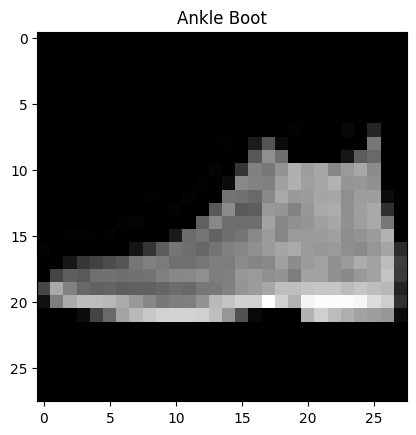

In [27]:
test_image = x_test[0]
plt.imshow(test_image, cmap='gray')
plt.title(label_encoder[y_test[0]])

In [28]:
# The image we see here is not normalized, whereas the images our model was trained on was were normalized images.

In [29]:
# Read image
test_image = x_test[0]
# Normalize the image
# Need to normalize is that the model is trained on normalized images, so it will perform only on normalized images
test_image = test_image / 255.0  # This will give us the output(28, 28), whereas our model wants the shape to be(1, 28, 28)
# Need to introduce a new dimension
print(f'Before np.expand, {test_image.shape}')
test_image = np.expand_dims(test_image, axis=0)
# Expand dimension helps you put up a new dimension, we mention here axis=0 so it adds the dimension at the very beginnibg
print(f'After np.expand, {test_image.shape}')

Before np.expand, (28, 28)
After np.expand, (1, 28, 28)


In [30]:
result = model.predict(test_image)  # This is the result of the softmax thet we have put in the last step
# Why did we put softmax, so that it will give us 10 different probabilities of all the things
result

1/1 [==============================] - 0s 357ms/step


array([[1.98336129e-05, 8.19309716e-05, 1.17369433e-04, 9.40452010e-05,
        2.06986397e-06, 1.11409396e-01, 4.15995892e-05, 2.49022886e-01,
        7.84706976e-03, 6.31363809e-01]], dtype=float32)

In [33]:
result.sum()

1.0

In [31]:
print(f"Probability: {np.max(result)}")
print(f"Index:{np.argmax(result)}")  # Argmax gives you the position where the value is maximum

Probability: 0.6313638091087341
Index:9


In [32]:
label_encoder[9]

'Ankle Boot'

In [72]:
def predict(image):
  plt.imshow(image, cmap="gray")
  image = image/255.0
  image = np.expand_dims(image, axis=0)
  result = model.predict(image)
  prob = np.max(result)
  result = np.argmax(result)
  plt.title(label_encoder[result])
  return label_encoder[result], prob

1/1 [==============================] - 0s 22ms/step


('Dress', 0.9931768)

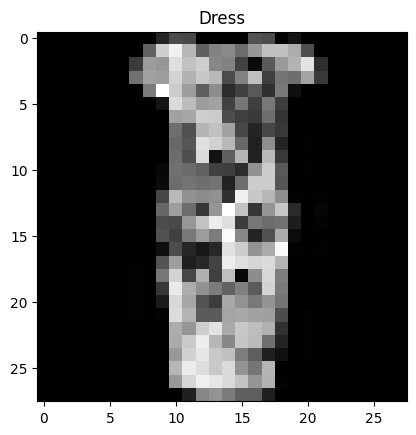

In [73]:
predict(x_test[100])

In [39]:
test_5_images = x_test[0:5]

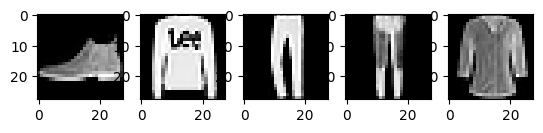

In [41]:
# The enumerate() function is useful for situations where you need to keep track of both the index and the value of each element in a sequence.
# For example, you might use enumerate() to iterate over a list of items and print the index and value of each item to the console.

for index, i in enumerate(test_5_images):
  plt.subplot(1, 5,index+1)
  plt.imshow(i, cmap = 'gray')

In [42]:
test_5_images = test_5_images/255.0    # Normalizing the 5 images
print(test_5_images.shape)

(5, 28, 28)


In [43]:
result = model.predict(test_5_images)
result
# We will have a very big array, for all the 5 images, we will have the 10, 10 probabilities

1/1 [==============================] - 0s 34ms/step


array([[1.98336002e-05, 8.19310008e-05, 1.17369462e-04, 9.40451355e-05,
        2.06986442e-06, 1.11409262e-01, 4.15995601e-05, 2.49022841e-01,
        7.84707256e-03, 6.31363988e-01],
       [1.62825745e-05, 3.56619694e-06, 9.78196383e-01, 4.10530583e-06,
        9.16548911e-03, 1.10504807e-10, 1.26004452e-02, 1.87848999e-12,
        1.37173847e-05, 1.02369824e-09],
       [1.08414069e-05, 9.99896646e-01, 1.15029179e-05, 4.20620418e-05,
        3.88774388e-05, 1.07210116e-10, 1.73703008e-08, 1.95141290e-08,
        3.55809382e-09, 1.23057875e-08],
       [1.80350457e-06, 9.99758542e-01, 1.44591741e-05, 2.11237901e-04,
        1.37245734e-05, 6.63110067e-10, 1.53958570e-08, 9.71268008e-08,
        2.14938667e-09, 1.33932517e-07],
       [1.31702185e-01, 2.00835872e-03, 2.04667270e-01, 1.36570828e-02,
        2.19516512e-02, 4.48260871e-05, 6.21603668e-01, 2.07105586e-06,
        4.32049343e-03, 4.23772362e-05]], dtype=float32)

In [44]:
np.argmax(result, axis = 1)

array([9, 2, 1, 1, 6])

In [46]:
y_test[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

Great accuracy here all the answers found correctly!

In [47]:
x_test_normalized = x_test/255.0   # Taking the entire dataset

In [48]:
y_pred = np.argmax(model.predict(x_test_normalized), axis = 1)  # Model. predict would have just given us the probabilities so did argmax
# The numpy.argmax() function in Python returns the indices of the maximum values along an axis.
# It's often used in machine learning to find the class with the largest predicted probability.

313/313 [==============================] - 1s 3ms/step


In [49]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [50]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [51]:
y_pred == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [53]:
(y_pred == y_test).sum()

8470

In [54]:
# Only 8470/10,000 times the prediction is correct

# Now to get to know which images failed the prediction

np.where(y_pred != y_test)  #this will return indexes of the images, where prediction is not actual i.e. y_test

(array([  12,   17,   21, ..., 9977, 9979, 9985]),)

Actual Label: Sneaker
Predicted Label: Scandal


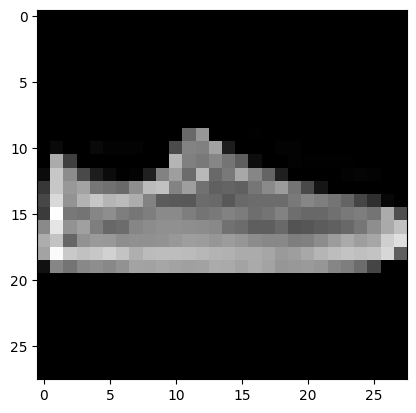

In [56]:
print(f"Actual Label: {label_encoder[y_test[12]]}")
print(f"Predicted Label: {label_encoder[y_pred[12]]}")
plt.imshow(x_test[12], cmap = 'gray')
plt.show()

Actual Label: Coat
Predicted Label: Pullover


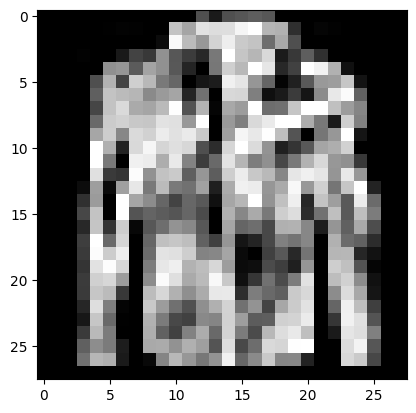

In [58]:
print(f"Actual Label: {label_encoder[y_test[17]]}")
print(f"Predicted Label: {label_encoder[y_pred[17]]}")
plt.imshow(x_test[17], cmap = 'gray')
plt.show()

Actual Label: Shirt
Predicted Label: T-shirt/top


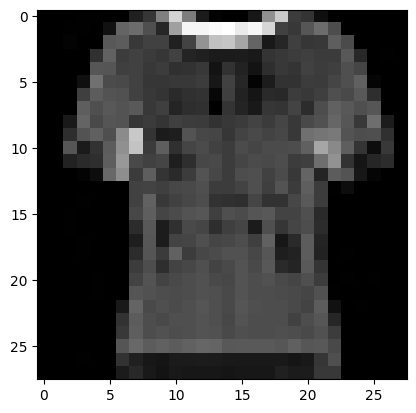

In [59]:
print(f"Actual Label: {label_encoder[y_test[9977]]}")
print(f"Predicted Label: {label_encoder[y_pred[9977]]}")
plt.imshow(x_test[9977], cmap = 'gray')
plt.show()

In [64]:
import sklearn

In [65]:
from sklearn.metrics import confusion_matrix

In [61]:
list(label_encoder.values())

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Scandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [74]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5,6,7,8,9])
cm

array([[801,   2,  16,  69,   7,   5,  86,   0,  14,   0],
       [  2, 953,   5,  32,   5,   0,   2,   0,   1,   0],
       [ 18,   4, 776,  14, 126,   1,  52,   0,   9,   0],
       [ 18,  10,  11, 897,  31,   1,  26,   0,   6,   0],
       [  0,   1, 118,  41, 761,   0,  72,   0,   7,   0],
       [  0,   0,   0,   1,   0, 926,   0,  51,   4,  18],
       [134,   2, 124,  63, 106,   1, 539,   0,  31,   0],
       [  0,   0,   0,   0,   0,  34,   0, 929,   0,  37],
       [  0,   1,  10,  10,   4,   6,  12,   5, 952,   0],
       [  0,   0,   0,   0,   0,  13,   0,  50,   1, 936]])

<Axes: >

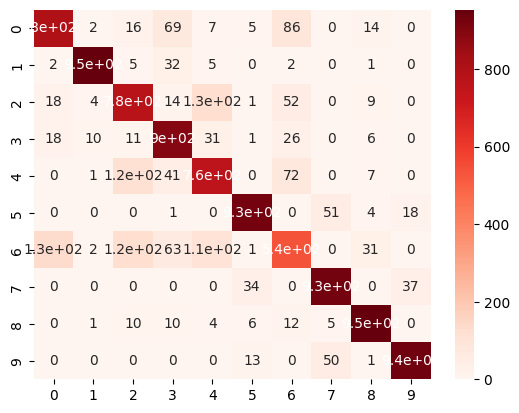

In [71]:
# from sklearn.metrics(y_test, y_pred, list(label_encoder.values()))  # This is a way to do the confusion matrix but here we have array and we cannot label array.

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap ='Reds')

In [75]:
pd.DataFrame(cm)

,0,1,2,3,4,5,6,7,8,9
0,801,2,16,69,7,5,86,0,14,0
1,2,953,5,32,5,0,2,0,1,0
2,18,4,776,14,126,1,52,0,9,0
3,18,10,11,897,31,1,26,0,6,0
4,0,1,118,41,761,0,72,0,7,0
5,0,0,0,1,0,926,0,51,4,18
6,134,2,124,63,106,1,539,0,31,0
7,0,0,0,0,0,34,0,929,0,37
8,0,1,10,10,4,6,12,5,952,0
9,0,0,0,0,0,13,0,50,1,936


In [ ]:
# Conclusion shirts are getting confused with tshirts and Sandals with Shoes